# Partie 2

In [1]:
from math import pi, sin, tan, atan
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt

t0, tf = 0, 100 # s
v0 = 10 # m/s
a, b = 1.1, 3.3 # m

y0, theta0 = 0, 0
t_interval = np.linspace(0, 100, 1000)


A = np.matrix([[0, v0], 
               [0, 0]])

B = np.matrix([[(a/b)*v0],
               [v0/b]] )

C = np.matrix([1, 0]) #! verif que c'est pas l'inverse
D = np.matrix([0])

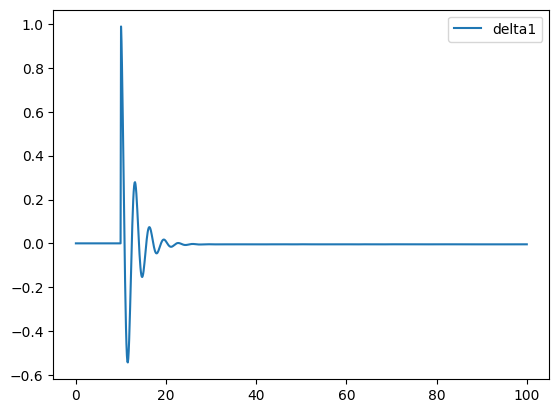

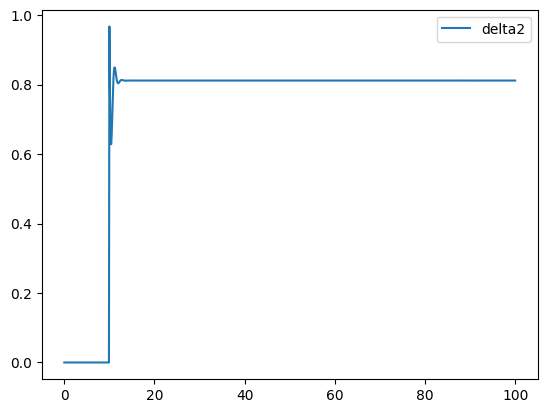

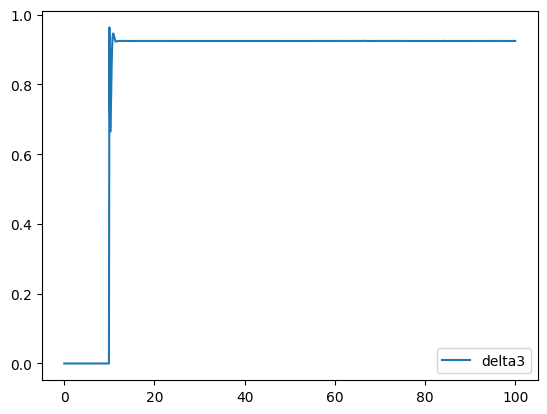

In [9]:
k_r = 1

K_1 = [0.132, -0.0132]
K_2 = [0.132, 0.5148]
K_3 = [0.132, 1.1088]


def syst_controle(t, y, r, K):
    Y = np.matrix([[y[0]], 
                   [y[1]]])
    # on calcule directement les 2 variables d'état
    matrice = (A-K*B) * Y + (k_r*B) * r(t) # ici (A-K*B) = A_tilde et (k_r*B) = B_tilde

    dy = matrice[0,0]
    dtheta = matrice[1,0]
    
    return dy, dtheta

def fonction_echellon(t):
    return t>= 0

def r_fonction(t):
    return fonction_echellon(t-10)

sortie_cible = r_fonction(t_interval)

sol_controle_1 = sc.integrate.solve_ivp(syst_controle, [t0, tf], [y0, theta0], t_eval = t_interval, args=[r_fonction, K_1])
sol_controle_2 = sc.integrate.solve_ivp(syst_controle, [t0, tf], [y0, theta0], t_eval = t_interval, args=[r_fonction, K_2])
sol_controle_3 = sc.integrate.solve_ivp(syst_controle, [t0, tf], [y0, theta0], t_eval = t_interval, args=[r_fonction, K_3])


delta_matrice_1 = - (K_1 @ sol_controle_1["y"]) + (k_r * sortie_cible)
delta_matrice_2 = - (K_2 @ sol_controle_2["y"]) + (k_r * sortie_cible)
delta_matrice_3 = - (K_3 @ sol_controle_3["y"]) + (k_r * sortie_cible)

delta_tableau_1 = np.squeeze(np.asarray(delta_matrice_1)) # on passe sous forme de tableau pour utiliser matplotlib
delta_tableau_2 = np.squeeze(np.asarray(delta_matrice_2))
delta_tableau_3 = np.squeeze(np.asarray(delta_matrice_3))


plt.figure()
"""plt.plot(t_interval, sortie_cible, label='reference r(t)')
plt.plot(sol_controle_1["t"], sol_controle_1["y"][0], label ='sortie')"""
#plt.plot(sol_controle_2["t"], sol_controle_2["y"][0], label ='sortie2')
#plt.plot(sol_controle_3["t"], sol_controle_3["y"][0], label ='sortie3')
plt.plot(t_interval, delta_tableau_1, label='delta1')
plt.legend()
plt.show()

plt.figure()
"""plt.plot(t_interval, sortie_cible, label='reference r(t)')
plt.plot(sol_controle_2["t"], sol_controle_2["y"][0], label ='sortie')"""
#plt.plot(sol_controle_2["t"], sol_controle_2["y"][0], label ='sortie2')
#plt.plot(sol_controle_3["t"], sol_controle_3["y"][0], label ='sortie3')
plt.plot(t_interval, delta_tableau_2, label='delta2')
plt.legend()
plt.show()

plt.figure()
"""plt.plot(t_interval, sortie_cible, label='reference r(t)')
plt.plot(sol_controle_3["t"], sol_controle_3["y"][0], label ='sortie')"""
#plt.plot(sol_controle_2["t"], sol_controle_2["y"][0], label ='sortie2')
#plt.plot(sol_controle_3["t"], sol_controle_3["y"][0], label ='sortie3')
plt.plot(t_interval, delta_tableau_3, label='delta3')
plt.legend()
plt.show()